## **CNN example from Chollet's Book (Pytorch Version)**
- Convolutional neural networks have been applied widely in text, image and audio tasks - although recently replaced by transformers.  
    [Reference: Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)

- I tried to replicate the code in the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) but using the Pytorch library instead of Keras which is used in the book.

- I found it difficult to work with Keras which is using Tensorflow as backend (Google dropped support for tf on Windows - which means you can't use the GPU for training - *we all know how slow training neural networks with the CPU can be!* )

- Keras can be better than Pytorch sometimes - its just that I could not set up Keras to use Pytorch as backend! (*Using WSL in Vscode works with TF but reading files from the local drives is quite troublesome too!*)

In [1]:
# import os and shutil to move files into folders
import os, shutil

In [2]:
# set the directories
original_dataset_dir = r"D:\ml_examples\dogs_vs_cats"
train_dir = r"D:\ml_examples\dogs_vs_cats\train"
validation_dir = r"D:\ml_examples\dogs_vs_cats\validation"
test_dir = r"D:\ml_examples\dogs_vs_cats\test"

# create working directories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# uncomment to create directories
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
 

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [3]:
import torch
# set seed in torch
torch.manual_seed(235)

# If using CUDA, set seed to CUDA
if torch.cuda.is_available():
    torch.cuda.manual_seed(235)
    torch.cuda.manual_seed_all(235)  # for multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

### **Set seed**
- While doing my final year project, I realised that we needed to explicitly set the seed for the required applications to ensure replicability of results.  
 
- For my FYP, I needed to set the seed for R too as I was using rpy2 to use the "copula" package from R. 

In [4]:
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader

# specify the transformation for the images - resize to 150x150 and convert to tensor (values between 0 and 1)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

# load the images with a dataloader - avoid loading all images into memory
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Preparing Images for CNN Training 
- In Chollet's book, he resizes all images to size 150 $\times$ 150

- ToTensor in Pytorch converts PIL Image in range [0,255] to [0,1]  
    [ToTensor documentation ](https://pytorch.org/vision/master/generated/torchvision.transforms.ToTensor.html)

- ImageFolder 
    - [ImageFolder documentation -> click on source and look at attributes](https://pytorch.org/vision/master/generated/torchvision.datasets.ImageFolder.html?highlight=image+folder)
    - returns tuple with (picture path, class)  

- Then, we use a DataLoader to load images by batch into our neural network for training - helps to manage memory efficiently and prevents memory overflow

- While training, remember to move the model + data to GPU! *(I did not realise that I used CPU for all computations during my FYP - such a stupid mistake..........)*


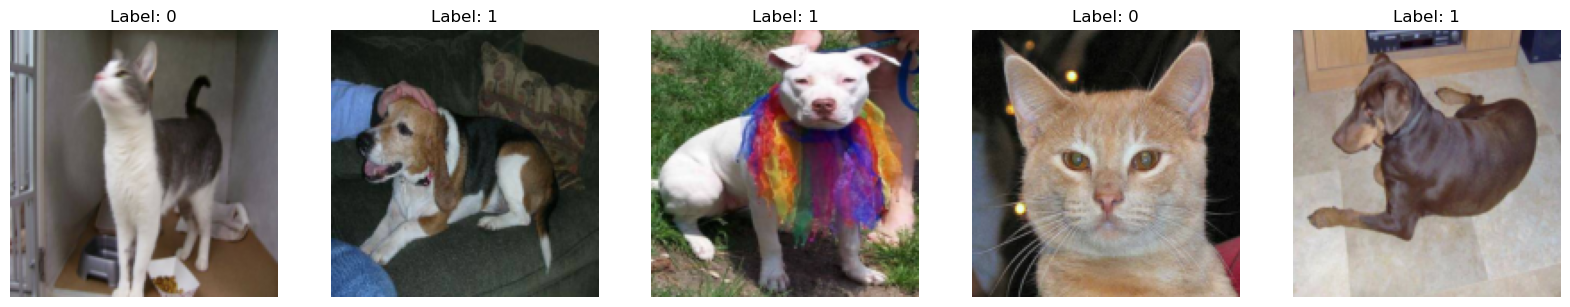

In [5]:
import matplotlib.pyplot as plt

# Display the first 5 images from the training set
plt.figure(figsize=(20, 4)) #set the figure size
for count, (images, labels) in enumerate(train_dataloader):  # Assuming train_loader is already defined
    if count<5:
        # Get the first image and label
        image = images[0].permute(1, 2, 0)  # Rearrange dimensions to (H, W, C) -> originally (channel, height, width)
        label = labels[0]
        # Display image
        plt.subplot(1, 5, count+1)
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis("off")
    else:
        break
plt.show()

In [6]:
# instantiate the pretrained model from pytorch
from torchvision.models import vgg16
pretrained_model = vgg16(pretrained=True)

c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
from torchinfo import summary
summary(pretrained_model, (20,3,150,150), col_names=("input_size", "output_size", "num_params"))

c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
VGG                                      [20, 3, 150, 150]         [20, 1000]                --
├─Sequential: 1-1                        [20, 3, 150, 150]         [20, 512, 4, 4]           --
│    └─Conv2d: 2-1                       [20, 3, 150, 150]         [20, 64, 150, 150]        1,792
│    └─ReLU: 2-2                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─Conv2d: 2-3                       [20, 64, 150, 150]        [20, 64, 150, 150]        36,928
│    └─ReLU: 2-4                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─MaxPool2d: 2-5                    [20, 64, 150, 150]        [20, 64, 75, 75]          --
│    └─Conv2d: 2-6                       [20, 64, 75, 75]          [20, 128, 75, 75]         73,856
│    └─ReLU: 2-7                         [20, 128, 75, 75]         [20, 128, 75, 75]         --
│    └─Conv2d: 2-8      

### **VGG16 Structure**
1. feature
- Convolutional and maxpool layers 
- used to extract features

2. avgpool
- Adaptive average pooling layer 
- kernel and stride size adjusted to match fixed output dimension

3. classifier
- dense and dropout layers to perform classification


In [8]:
# import torch and related libraries for machine learning
from torch import nn # base class for all neural network modules
from tqdm import tqdm # for iteration (for progress bar)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # to load inputs and targets to GPU (if available)

class CNN_pretrained(nn.Module):
    def __init__(self, pretrained_model, loss_fn=nn.BCELoss(), opt=torch.optim.RMSprop, lr=0.0001): 
        super().__init__() # inherit from nn.Module (base class for all Modules)

        self.loss_fn = loss_fn # loss function
        self.loss_list = list() # store loss values
        self.acc_list = list() # store training set accuracy values
        self.val_acc_list = list() # store validation set accuracy values

        self.pretrained_layers = pretrained_model.features # load pretrained model

        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*4*4,256),
            nn.ReLU(),
            nn.Linear(256,1),
            nn.Sigmoid()
        ) # instantiate layers for classifier 
        
        # optimizer parameters
        self.lr = lr
        self.opt = opt(self.parameters(), lr=self.lr)

    # freeze convolutional layers (feature layers in pretrained model)
    def freeze_conv(self):
        for param in self.pretrained_layers.parameters():
            param.requires_grad = False
        
    # perform forward pass
    def forward(self, x):
        x = self.pretrained_layers(x) # pass through pretrained model to extract features
        x = self.layers(x) # pass through classifier
        return x
    
    # loop to fit model
    def fit(self, train_data, valid_data, epochs=10):
        for i in range(epochs):
            for j, data in enumerate(tqdm(train_data)):
                inputs, targets = data # get inputs
                inputs, targets = inputs.to(device), targets.to(device) # move to device
                self.opt.zero_grad() # zero the gradients before backward pass so that we do accumulate gradients from last epoch
                y_pred = self.forward(inputs)
                loss = self.loss_fn(y_pred,targets.reshape(-1,1).float()) # calculate loss
                loss.backward() # perform backward pass
                self.opt.step()  # update weights
                self.loss_list.append(loss.item()) # update current loss
            print(f"Epoch {i+1}: loss = {loss.item()}")
            print(f"Number of trainable parameters: {sum(p.numel() for p in self.parameters() if p.requires_grad)}")
            
            self.acc_list.append(self.evaluate(train_data)) # evaluate model on training data
            self.val_acc_list.append(self.evaluate(valid_data)) # evaluate model on validation data
        print("Training Complete")
    
    # switch off gradient calculation for prediction
    def predict(self, x):
        self.eval()
        with torch.no_grad():
            return self.forward(x)

    def evaluate(self, valid_data):
        # set model to eval mode
        self.eval()
        count= 0
        running_corrects = 0
        # loop over data and calculate accuracy (note that we use cross entropy loss to train classifier - 
        # match distribution of class labels with true value) 
        with torch.no_grad():
            for i, data in enumerate(tqdm(valid_data)):
                inputs, y_true = data
                inputs, y_true = inputs.to(device), y_true.to(device)
                y_pred = (self.predict(inputs) >= 0.5).long()
                running_corrects += torch.sum(y_pred == y_true.view_as(y_pred))
                count += y_true.shape[0]
        
        accuracy = running_corrects.float() / count
        print(f"Accuracy: {accuracy:.4f}")
        return accuracy

### **CNN Modules Explained**

#### 1. **Convolution layers - 3 $\times$ 3 kernel with no strides / no padding**

|Explanation|
|----| 
|Convolution layers try to learn features from the original image with filters + performs regularization (by reducing dimensions of input image)|  
|Larger output channel size vs input channel size helps to extract different features from the image (It will learn to identify certain features from a image after training on data)|  
|Using a stride > 1  allows the filter to cover larger areas of the original image <br> This increases the effective receptive field, allowing the NN to "look" at a larger area of the original image <br>[Reference: STRIVING FOR SIMPLICITY: THE ALL CONVOLUTIONAL NET](https://arxiv.org/pdf/1412.6806)|
|Padding allows the filter to capture features around the edge of the original image/ maintains the image size after applying conv|

#### 2. **ReLU Activation**

|Explanation|
|----|
| ReLU builds non-linearity into the NN (allows the NN to be more expressive and approximate non-linear functions)|
|Sigmoid was used previously but the gradient of the sigmoid vanishes for large/ small values - therefore replaced with ReLU|
|However, ReLU has zero gradient for values < 0 - Leaky ReLU overcomes this by allowing negative gradients to propagate|

#### 3. **Maxpooling layers 2 $\times$ 2 kernel**

|Explanation|
|------|
| Regularization (dimension reduction) and also feature extraction (allows the CNN to "focus" on the more "obvious" features in the image)|

#### 4. **Flatten**

|Explanation|
|------|
|Quickens computations/ to be fed into Linear layers|

#### 5. **Linear layer**

|Explanation|
|------|
|Typical MLP layer - weights inputs with learnt weights|

#### 6. **Dropout**

|Explanation|
|------|
|Reduces overfitting|
|Even without the input, the neighbouring inputs is able to provide information about the original image|
|can be thought of as a form of model averaging|
|[Reference: Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)|

#### 6. **Sigmoid**

|Explanation|
|------|
|Forces output to be within [0,1]|

#### **Other Useful References**
- [Article about effective receptive fields of CNNs](https://distill.pub/2019/computing-receptive-fields/)

### **Training the CNN**
##### **Loss Function** 
- We use the BCELoss from the Pytorch package (Binary Cross Entropy Loss) - commonly used for binary classification 

#### **Optimizer**
- We use the RMSProp optimizer

- Uses momentum (weighted average of previous update + current update)

- RMS (Root mean square) - divides by average of squared gradients (we can think of it as second order change - smaller gradient update for later iterations)

- [Lecture Notes for RMSProp](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)


### **Things to Note!!!!**
1. Remember to move model and data to CUDA manually! *(I did not do this for all my previous projects - no wonder my CNNs took ages to train)*

2. For Pytorch:
- zero gradients before training
- perform forward pass (calculate outputs), - evaluate loss function
- then perform backward pass to evaluate gradients for the weights
- then update weights. 

3. Set model to evaluation mode and turn off gradient calculations before evaluating model (saves resources)

4. Remember to freeze feature weights before training - if not freezed, the dense layers are not initialized in the beginning - this will cause the values in the conv layers to change a lot


In [9]:
# instantiate the model
model = CNN_pretrained(pretrained_model=pretrained_model)
model.to(device) #move model to GPU if available
summary(model, (20,3,150,150), col_names=("input_size", "output_size", "num_params"))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CNN_pretrained                           [20, 3, 150, 150]         [20, 1]                   --
├─Sequential: 1-1                        [20, 3, 150, 150]         [20, 512, 4, 4]           --
│    └─Conv2d: 2-1                       [20, 3, 150, 150]         [20, 64, 150, 150]        1,792
│    └─ReLU: 2-2                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─Conv2d: 2-3                       [20, 64, 150, 150]        [20, 64, 150, 150]        36,928
│    └─ReLU: 2-4                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─MaxPool2d: 2-5                    [20, 64, 150, 150]        [20, 64, 75, 75]          --
│    └─Conv2d: 2-6                       [20, 64, 75, 75]          [20, 128, 75, 75]         73,856
│    └─ReLU: 2-7                         [20, 128, 75, 75]         [20, 128, 75, 75]         --
│    └─Conv2d: 2-8      

### **Final CNN Structure**
1. feature
- Convolutional and maxpool layers 
- used to extract features

2. classifier
- 2 dense layers with ReLU activation

In [10]:
model.freeze_conv() # freeze convolutional layers
model.fit(train_data=train_dataloader,valid_data=test_dataloader, epochs=30)

100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


Epoch 1: loss = 0.08150049299001694
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:09<00:00, 10.09it/s]


Accuracy: 0.9840


100%|██████████| 50/50 [00:05<00:00,  9.24it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


Epoch 2: loss = 0.02161679044365883
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:12<00:00,  8.25it/s]


Accuracy: 0.9960


100%|██████████| 50/50 [00:06<00:00,  7.80it/s]


Accuracy: 0.9540


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


Epoch 3: loss = 0.008399895392358303
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:11<00:00,  8.61it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.19it/s]


Accuracy: 0.9490


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


Epoch 4: loss = 0.003721547080203891
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:11<00:00,  8.49it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.41it/s]


Accuracy: 0.9440


100%|██████████| 100/100 [00:16<00:00,  6.04it/s]


Epoch 5: loss = 0.0032101620454341173
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:12<00:00,  8.30it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.87it/s]


Accuracy: 0.9510


100%|██████████| 100/100 [00:16<00:00,  5.93it/s]


Epoch 6: loss = 0.002982748206704855
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:12<00:00,  7.81it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.67it/s]


Accuracy: 0.9500


100%|██████████| 100/100 [00:22<00:00,  4.40it/s]


Epoch 7: loss = 0.0010151438182219863
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:16<00:00,  6.04it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.14it/s]


Accuracy: 0.9470


100%|██████████| 100/100 [00:17<00:00,  5.57it/s]


Epoch 8: loss = 0.00020145135931670666
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  6.87it/s]


Accuracy: 0.9470


100%|██████████| 100/100 [00:18<00:00,  5.37it/s]


Epoch 9: loss = 0.0008682297775521874
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.61it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  6.59it/s]


Accuracy: 0.9490


100%|██████████| 100/100 [00:17<00:00,  5.64it/s]


Epoch 10: loss = 0.00035927927820011973
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.30it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.21it/s]


Accuracy: 0.9490


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


Epoch 11: loss = 0.00012878773850388825
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  6.87it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.62it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:19<00:00,  5.25it/s]


Epoch 12: loss = 0.00016851877444423735
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.24it/s]


Accuracy: 0.9470


100%|██████████| 100/100 [00:18<00:00,  5.33it/s]


Epoch 13: loss = 3.6888359318254516e-05
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.23it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.17it/s]


Accuracy: 0.9480


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


Epoch 14: loss = 5.377184788812883e-05
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.42it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  6.44it/s]


Accuracy: 0.9440


100%|██████████| 100/100 [00:18<00:00,  5.28it/s]


Epoch 15: loss = 1.5396310118376277e-05
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  6.99it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  6.80it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:18<00:00,  5.46it/s]


Epoch 16: loss = 1.6613974366919138e-05
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  7.02it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.22it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:18<00:00,  5.40it/s]


Epoch 17: loss = 6.291261797741754e-06
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  7.03it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  7.01it/s]


Accuracy: 0.9480


100%|██████████| 100/100 [00:19<00:00,  5.04it/s]


Epoch 18: loss = 2.2646756860922324e-06
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  7.04it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.29it/s]


Accuracy: 0.9480


100%|██████████| 100/100 [00:18<00:00,  5.42it/s]


Epoch 19: loss = 9.563443654769799e-07
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.23it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:18<00:00,  5.43it/s]


Epoch 20: loss = 9.359752652926545e-07
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.38it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.53it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:17<00:00,  5.80it/s]


Epoch 21: loss = 1.0131739145435859e-06
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.95it/s]


Accuracy: 0.9460


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]


Epoch 22: loss = 8.066267582762521e-07
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.24it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.62it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:17<00:00,  5.75it/s]


Epoch 23: loss = 6.089673547648999e-07
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  7.13it/s]


Accuracy: 0.9450


100%|██████████| 100/100 [00:17<00:00,  5.70it/s]


Epoch 24: loss = 1.0722458654299771e-07
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.29it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.54it/s]


Accuracy: 0.9460


100%|██████████| 100/100 [00:18<00:00,  5.56it/s]


Epoch 25: loss = 6.1448382382423e-08
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.27it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.49it/s]


Accuracy: 0.9460


100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


Epoch 26: loss = 6.794292062295426e-08
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.25it/s]


Accuracy: 0.9470


100%|██████████| 100/100 [00:17<00:00,  5.74it/s]


Epoch 27: loss = 2.912493357598578e-08
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.67it/s]


Accuracy: 0.9480


100%|██████████| 100/100 [00:17<00:00,  5.80it/s]


Epoch 28: loss = 3.007902904528237e-08
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  6.73it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  7.00it/s]


Accuracy: 0.9470


100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


Epoch 29: loss = 2.0269430578423453e-08
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  7.12it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  7.08it/s]


Accuracy: 0.9470


100%|██████████| 100/100 [00:19<00:00,  5.02it/s]


Epoch 30: loss = 4.65703564600517e-09
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  6.94it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:07<00:00,  7.09it/s]


Accuracy: 0.9470
Training Complete


In [11]:
torch.save(model.state_dict(),original_dataset_dir+r"\model_vgg.pth") # save model

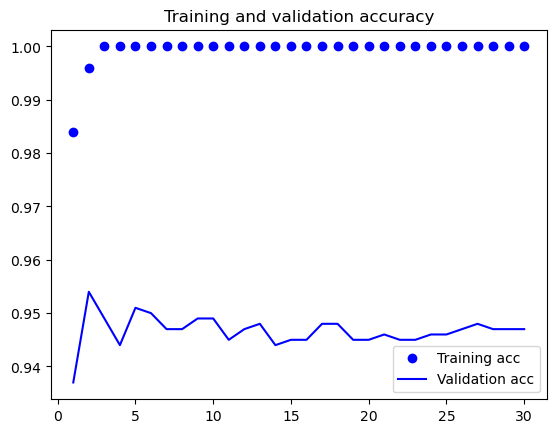

In [12]:
acc = torch.tensor(model.acc_list)
val_acc = torch.tensor(model.val_acc_list)
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### **Results**
- Validation accuracy peaks around 0.955 and declines slightly with further training epochs to 0.95

- To improve performance - we may need to increase number of convolution layers to obtain a larger effective receptive area ("look" at a larger area of the image to capture global features)

- May need to use Skip connect/ residual connections to avoid vanishing gradients as more layers are added

- Data augmentation and dropout can be used to improve the robustness of the model